# <center> Anjali Chawda Assignment- Clustering (Airlines) </center>
### - Email: anjalichawda241995@gmail.com

## <center> Hierarchial Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [2]:
airlines = pd.read_csv("EastWestAirlines - data.csv")

In [3]:
airlines.sample(5)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
908,20281,0,1,1,1,0,0,0,0,5567,0
2688,97535,0,1,1,1,0,0,0,0,2418,0
1410,176982,0,1,1,1,2299,9,0,0,5234,0
2289,85496,0,1,1,1,2799,7,2711,6,3820,0
3731,20882,0,1,1,1,1000,1,0,0,328,0


In [4]:
airlines.shape

(3999, 11)

In [5]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airlines['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

#### We see that the data-values of the features are high compared to some other features-->therefore we need to do scaling
#### Deciding the scaling technique to use, as few features are appearing to have outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x1b4667aefa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4667d0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4667aedf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4667d0b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4667d0df0>],
 'means': []}

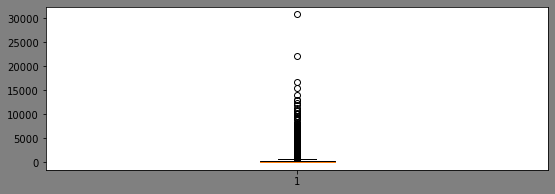

In [8]:
# preparing a boxplot to detect the outliers for few of the features

plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['Flight_miles_12mo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4668b22b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4668b2850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4668a4fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4668b2df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4668c2100>],
 'means': []}

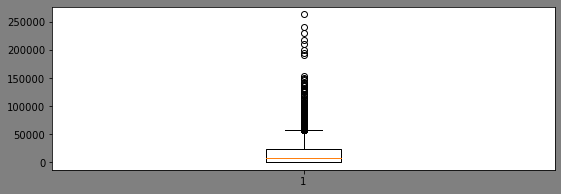

In [9]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['Bonus_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b46691a820>,
 'caps': [<matplotlib.lines.Line2D at 0x1b46691adc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b46691a550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4669263a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b466926670>],
 'means': []}

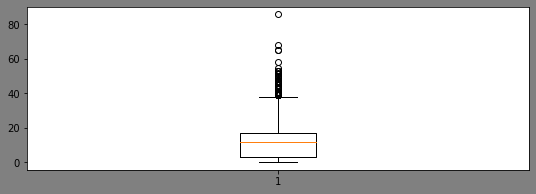

In [10]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['Bonus_trans'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b46697e790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b46697ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b46697e4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b46698e340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b46698e610>],
 'means': []}

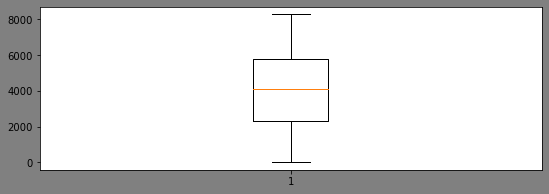

In [11]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['Days_since_enroll'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4669e56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4669e5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4669e5400>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4669f1250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4669f1520>],
 'means': []}

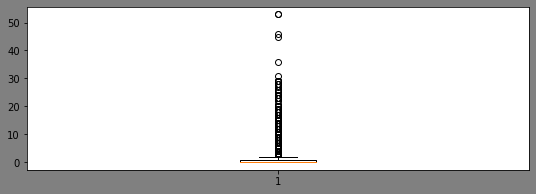

In [12]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['Flight_trans_12'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b466a437f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b466a43d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b466a43520>],
 'medians': [<matplotlib.lines.Line2D at 0x1b466a52370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b466a52640>],
 'means': []}

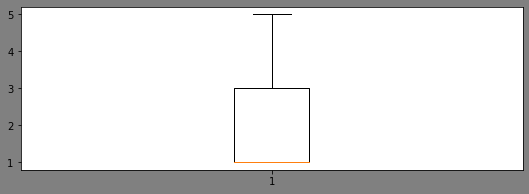

In [13]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['cc1_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b466aab3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b466aab940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b466aab0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b466aabee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b466ab91f0>],
 'means': []}

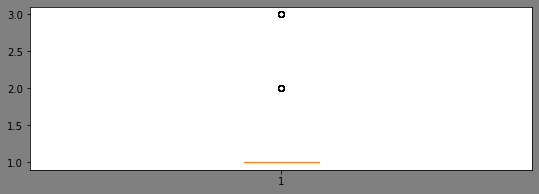

In [14]:
plt.figure(figsize=(9,3), facecolor='gray')
plt.boxplot(airlines['cc2_miles'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar_mm = MinMaxScaler()

In [16]:
df1 = airlines.drop('Award?',axis=1 )

In [17]:
df1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [18]:
df1_scaled = scalar_mm.fit_transform(df1.to_numpy())

In [19]:
df1_scaled

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84374246],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.        ,
        0.83988425],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84784181],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.16879672],
       [0.03220189, 0.        , 0.        , ..., 0.01622481, 0.01886792,
        0.16867615],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16831444]])

In [20]:
df_scaled = pd.DataFrame(df1_scaled, columns=[
  'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll'])

In [21]:
df_scaled.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [22]:
df_scaled['Award'] = airlines["Award?"]

In [23]:
airlines.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
df_scaled.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1


In [25]:
df_scaled.shape

(3999, 11)

- Since is the data is too large, I took the sample of 100 data from the scaled one, to create a dendrogram. 

In [26]:
df_sample = df_scaled.iloc[0:100,:]

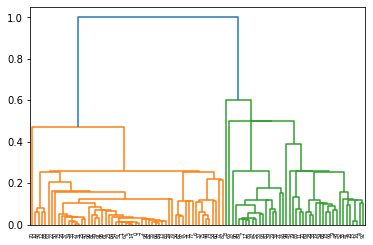

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_sample, method ="single"))

### Silhouette Score for getting Clusters:

- I also tried calculating Silhouette Score for getting the number of clusters, but it is showing 3, which is incorrect

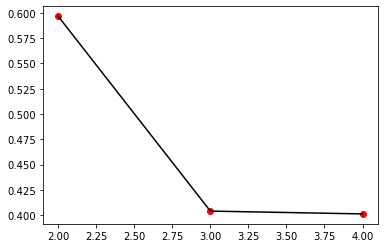

In [28]:
from sklearn.metrics import silhouette_score as sil

nc = [2,3,4]
sc_score = []
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='complete')
    
    y = hc.fit_predict(df_scaled.iloc[:,:-1])
    sc_score.append(sil(df_scaled.iloc[:,:-1],y))
    
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [29]:
sc_score

[0.5966617549165919, 0.40401276248027285, 0.4012188277077964]

#### From the plot we can see 3 clusters can be drawn

In [30]:
merge = sch.linkage(df_scaled, method = 'single')

In [31]:
cluster =  AgglomerativeClustering(n_clusters= 2,affinity='euclidean',linkage='single')

In [32]:
cluster.fit_predict(df_scaled)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [33]:
y_pred = cluster.fit_predict(df_scaled)

In [34]:
airlines['hc'] = y_pred

In [35]:
airlines.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [36]:
cluster.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [37]:
airlines.groupby(['hc'])["Award?"].apply(lambda x:tuple(x))

hc
0    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Award?, dtype: object

In [38]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'hc'],
      dtype='object')

In [39]:
airlines.iloc[:,10]

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Name: Award?, Length: 3999, dtype: int64

In [40]:
airlines.groupby(['hc'])["Balance"].apply(lambda x:tuple(x))

hc
0    (97752, 20856, 443003, 104860, 96522, 28495, 5...
1    (28143, 19244, 41354, 14776, 16420, 84914, 400...
Name: Balance, dtype: object

In [41]:
airlines.groupby(['hc'])["Qual_miles"].apply(lambda x:tuple(x))

hc
0    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2024, 0, 0, ...
1    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0...
Name: Qual_miles, dtype: object

In [42]:
airlines.groupby(['hc'])["cc1_miles"].apply(lambda x:tuple(x))

hc
0    (4, 1, 3, 3, 5, 4, 4, 1, 3, 3, 5, 1, 3, 1, 4, ...
1    (1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...
Name: cc1_miles, dtype: object

In [43]:
airlines.groupby(['hc'])["cc2_miles"].apply(lambda x:tuple(x))

hc
0    (1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: cc2_miles, dtype: object

In [44]:
airlines.groupby(['hc'])["cc3_miles"].apply(lambda x:tuple(x))

hc
0    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: cc3_miles, dtype: object

In [45]:
airlines.groupby(['hc'])["Bonus_miles"].apply(lambda x:tuple(x))

hc
0    (43300, 5250, 1753, 28426, 61105, 49442, 48963...
1    (174, 215, 4123, 500, 0, 27482, 7278, 11150, 3...
Name: Bonus_miles, dtype: object

In [46]:
airlines.groupby(['hc'])["Bonus_trans"].apply(lambda x:tuple(x))

hc
0    (26, 4, 43, 28, 19, 15, 16, 5, 17, 5, 23, 16, ...
1    (1, 2, 4, 1, 0, 25, 10, 20, 6, 0, 11, 11, 21, ...
Name: Bonus_trans, dtype: object

In [47]:
airlines.groupby(['hc'])["Flight_miles_12mo"].apply(lambda x:tuple(x))

hc
0    (2077, 250, 3850, 1150, 0, 0, 0, 0, 0, 0, 250,...
1    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3450, 150, 700,...
Name: Flight_miles_12mo, dtype: object

In [48]:
airlines.groupby(['hc'])["Flight_trans_12"].apply(lambda x:tuple(x))

hc
0    (4, 1, 12, 3, 0, 0, 0, 0, 0, 0, 2, 9, 1, 1, 5,...
1    (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 1, 4, 0, 2,...
Name: Flight_trans_12, dtype: object

In [49]:
airlines.groupby(['hc'])["Days_since_enroll"].apply(lambda x:tuple(x))

hc
0    (6935, 6938, 6948, 6931, 6924, 6912, 6910, 690...
1    (7000, 6968, 7034, 6952, 6942, 6994, 6959, 692...
Name: Days_since_enroll, dtype: object

In [50]:
df_scaled.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

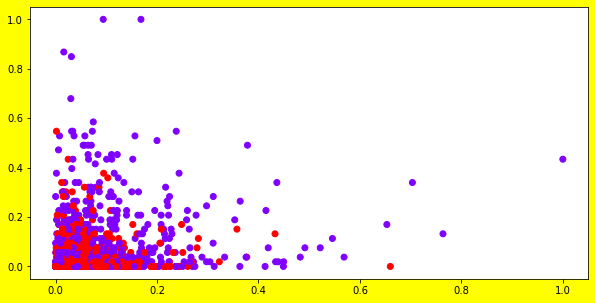

In [51]:
plt.figure(figsize= (10,5), facecolor="yellow", )
plt.scatter(df_scaled['Balance'], df_scaled["Flight_trans_12"], c=cluster.labels_,cmap="rainbow")

## <center><u> KMEANS for Airlines</u>

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scalar_mm = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

In [53]:
airl = pd.read_csv('EastWestAirlines - data.csv')

In [54]:
airl.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [55]:
airl.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [56]:
df_scaled = scalar_mm.fit_transform(airl.iloc[:,:-1].to_numpy())

In [57]:
df_scaled = pd.DataFrame(df_scaled , columns = [['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']])

In [58]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [59]:
df_scaled['Award']= airl['Award?']

In [60]:
X = df_scaled.iloc[:,0:11]
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [61]:
wcss

[1830.7932128584112, 823.6756984125205, 625.1684881570721, 436.7171900419559]

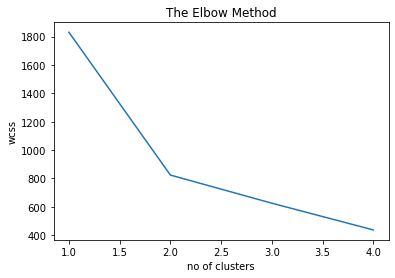

In [62]:
plt.plot(range(1,5), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [63]:
model_kmeans = KMeans(n_clusters= 2)
y_kmeans = model_kmeans.fit_predict(df_scaled)

In [64]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


In [65]:
# converting labels to series from nd array
labels = pd.Series(model_kmeans.labels_)

In [66]:
labels

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Length: 3999, dtype: int32

In [67]:
airl["labels"] = pd.Series(model_kmeans.labels_)

In [68]:
airl.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<AxesSubplot:xlabel='Balance', ylabel='Award?'>

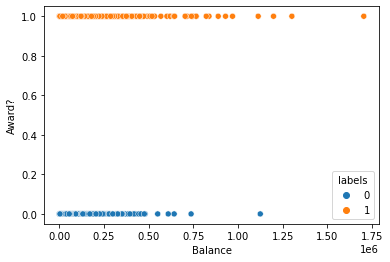

In [69]:
sns.scatterplot(airl['Balance'],airl['Award?'],hue=airl['labels'] )

<AxesSubplot:xlabel='Days_since_enroll', ylabel='Award?'>

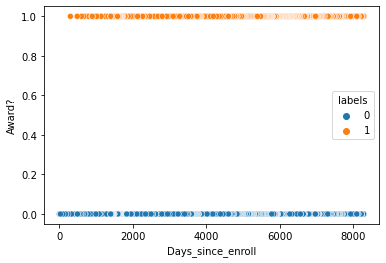

In [70]:
sns.scatterplot(airl['Days_since_enroll'],airl['Award?'],hue=airl['labels'] )

## <center><u> DBSCAN for Airlines<u>

In [71]:
dataset = pd.read_csv('EastWestAirlines - data.csv')

In [72]:
dataset.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [73]:
# min-max scalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [74]:
df = dataset.iloc[:,:-1]
df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [75]:
df_scaled = scalar.fit_transform(df.to_numpy())

In [76]:
df_scaled

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84374246],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.        ,
        0.83988425],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84784181],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.16879672],
       [0.03220189, 0.        , 0.        , ..., 0.01622481, 0.01886792,
        0.16867615],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16831444]])

In [77]:
# converting the numpy array to pandas data frame
df_scaled = pd.DataFrame(df_scaled , columns = [['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']])

In [78]:
df_scaled.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423


### Before doing DBSCAN we need to know the two parameter of DBSCAN model--> min-samples and eps :

#### Train-Test-Split Method:

In [79]:
X = df_scaled

In [80]:
y = dataset.iloc[:,-1]

In [82]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# randomly taken k=5
# not exactly the best way
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
accuracy_score(y_hat,y_test)

0.7325

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1,10,1)
k_scores =[]
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    scores = accuracy_score(y_test,y_hat)
    k_scores.append(scores)

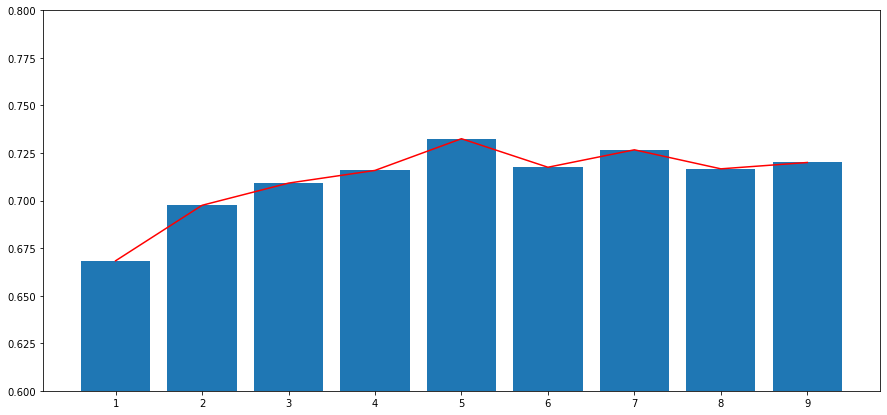

In [110]:
plt.figure(figsize=(15,7))
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores, color="red")
plt.xticks(k_range)
plt.ylim(0.6,0.8)
plt.show()

In [128]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

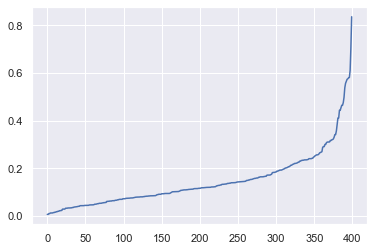

In [129]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [193]:
# min-sample = 10 , eps = 0.59
from sklearn.cluster import DBSCAN

# DBSCAN
dbs = DBSCAN(min_samples=10,eps=0.38)
class_pr = dbs.fit(X)

In [194]:
n_clusters_ = len(set(class_pr.labels_)) - (1 if -1 in class_pr.labels_ else 0)

In [195]:
n_clusters_

6

- DBSCAN is not optimal for this problem, as it is not giving exact number of clusters. 